<a href="https://colab.research.google.com/github/asifmanowar9/ML-Project/blob/main/ML_lab_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task
Build, train, and evaluate an image classification model for bank notes using the dataset located at "/content/drive/MyDrive/Datasets/ML Datasets/dataset".

## Verify Dataset Access

### Subtask:
First, we need to ensure the Google Drive is properly mounted and the dataset directory '/content/drive/MyDrive/Datasets/ML Datasets/dataset' is accessible. This step will list the contents of the directory to confirm access.


**Reasoning**:
To verify the dataset access and inspect its structure, I will use the `!ls` command to list the contents of the specified directory in Google Drive.



In [2]:
!ls '/content/drive/MyDrive/Datasets/ML Datasets/dataset'

test  train  val


## Load and Inspect Dataset

### Subtask:
Load the images from the specified directory. This will involve iterating through subdirectories (assuming each subdirectory represents a bank note class like '1000', '500', etc.) and associating each image with its corresponding label. We will also inspect a few sample images and check their dimensions.


**Reasoning**:
To load and inspect the dataset as specified in the subtask, I will use `tensorflow.keras.utils.image_dataset_from_directory` to load images from the train, validation, and test subdirectories. Then I will print the class names and display sample images with their labels and dimensions to verify the loading process.



Loading training data...
Found 10093 files belonging to 4 classes.
Loading validation data...
Found 2161 files belonging to 4 classes.
Loading test data...
Found 2167 files belonging to 4 classes.

Class names: ['100', '1000', '50', '500']
Number of classes: 4

Sample image batch shape: (32, 224, 224, 3)
Sample image data type: <dtype: 'uint8'>


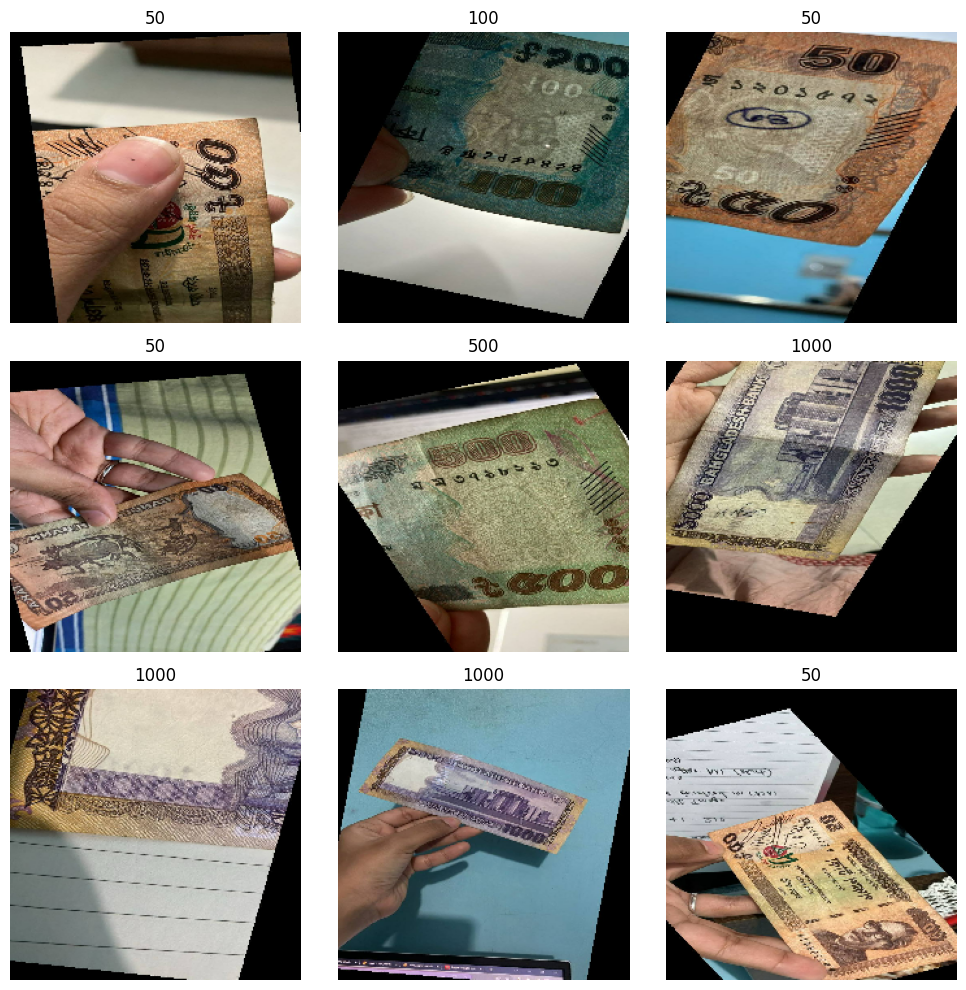

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# 2. Define the base path to your dataset
dataset_base_path = '/content/drive/MyDrive/Datasets/ML Datasets/dataset'

image_size = (224, 224) # Common image size for many CNN models
batch_size = 32
seed = 123

# 3. Load the training, validation, and test datasets
print("Loading training data...")
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(dataset_base_path, 'train'),
    labels='inferred',
    label_mode='int',
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    seed=seed
)

print("Loading validation data...")
val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(dataset_base_path, 'val'),
    labels='inferred',
    label_mode='int',
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False, # No need to shuffle validation data
    seed=seed
)

print("Loading test data...")
test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(dataset_base_path, 'test'),
    labels='inferred',
    label_mode='int',
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False, # No need to shuffle test data
    seed=seed
)

# 4. Print the class names inferred by the dataset loader
class_names = train_ds.class_names
print(f"\nClass names: {class_names}")
print(f"Number of classes: {len(class_names)}")

# 5. Iterate through a few batches of the training dataset and display sample images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): # Take one batch
    for i in range(9): # Display first 9 images from the batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
    print(f"\nSample image batch shape: {images.shape}")
    print(f"Sample image data type: {images.dtype}")
    break # Only process the first batch

plt.tight_layout()
plt.show()

# Task
Build, train, and evaluate an image classification model for bank notes using the dataset located at "/content/drive/MyDrive/Datasets/ML Datasets/dataset".

## Define and Compile Classification Model

### Subtask:
Choose and define an appropriate convolutional neural network (CNN) architecture for image classification, potentially using a pre-trained model (transfer learning), and compile it with an optimizer, loss function, and metrics.


**Reasoning**:
To define and compile the classification model as requested by the subtask, I will import TensorFlow and its necessary layers and applications, specifically `MobileNetV2` for transfer learning. I will then instantiate `MobileNetV2` as the base model, add a custom classification head, and compile the complete model with appropriate optimizer, loss function, and metrics. Finally, I will display the model summary.



In [5]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# 1. Import necessary layers and models already done above.

# 2. Instantiate a pre-trained base model (e.g., MobileNetV2) without its top classification layer
IMG_SHAPE = image_size + (3,) # (224, 224, 3)

base_model = MobileNetV2(input_shape=IMG_SHAPE,
                         include_top=False,
                         weights='imagenet')

# 3. Set the base model's layers to be non-trainable to leverage transfer learning.
base_model.trainable = False

# 4. Create a new classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x) # Add dropout for regularization

# Use len(class_names) for the number of units in the output layer
# Use 'softmax' activation for multi-class classification
predictions = Dense(len(class_names), activation='softmax')(x)

# 5. Combine the base model and the classification head into a complete tf.keras.Model
model = Model(inputs=base_model.input, outputs=predictions)

# 6. Compile the model
# Use SparseCategoricalCrossentropy because labels are integers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# 7. Print a summary of the model
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,263,108 (8.63 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Train Model

### Subtask:
Train the defined classification model using the already prepared training dataset and validate its performance on the validation set over several epochs. We will monitor metrics like accuracy and loss during training.


**Reasoning**:
To train the model as specified, I will use the `model.fit()` method with the prepared training and validation datasets, setting the number of epochs and storing the training history.



In [6]:
epochs = 10
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
)

Epoch 1/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 1323s 4s/step - accuracy: 0.2521 - loss: 1.9749 - val_accuracy: 0.3665 - val_loss: 1.3147
Epoch 2/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 688s 2s/step - accuracy: 0.3164 - loss: 1.5745 - val_accuracy: 0.4789 - val_loss: 1.1996
Epoch 3/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 658s 2s/step - accuracy: 0.3736 - loss: 1.4215 - val_accuracy: 0.5229 - val_loss: 1.1253
Epoch 4/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 665s 2s/step - accuracy: 0.4300 - loss: 1.3008 - val_accuracy: 0.5650 - val_loss: 1.0687
Epoch 5/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 687s 2s/step - accuracy: 0.4636 - loss: 1.2255 - val_accuracy: 0.5965 - val_loss: 1.0246
Epoch 6/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 697s 2s/step - accuracy: 0.4838 - loss: 1.1748 - val_accuracy: 0.6173 - val_loss: 0.9916
Epoch 7/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 672s 2s/step - accuracy: 0.5227 - loss: 1.1044 - val_accuracy: 0.6289 - val_loss: 0.9638
Epoch 8/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 702s 2s/step - accuracy: 0.5329 - loss: 1.0821 - val_acc

## Visualize Model Performance

### Subtask:
Visualize the training and validation accuracy and loss curves over the epochs to understand the model's learning process and identify potential overfitting or underfitting.

### Reasoning:
To visualize the model's performance, I will plot the accuracy and loss curves for both the training and validation sets using the `history` object returned by `model.fit()`. This will help in understanding the model's learning trend over epochs.

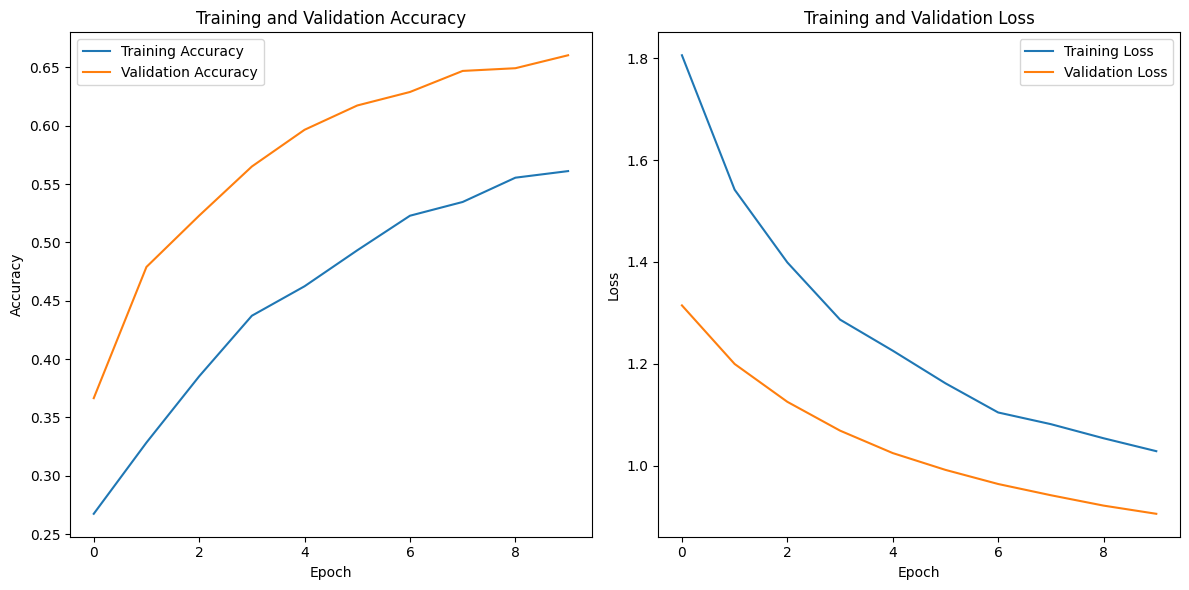

In [10]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
model.save('/content/drive/MyDrive/mobilenetv2_trained_model.keras')

## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance on the unseen test dataset. This will provide an unbiased assessment of the model's generalization capabilities.

### Reasoning:
To evaluate the model's performance on the test dataset, I will use the `model.evaluate()` method with the `test_ds` dataset. This will output the loss and accuracy metrics on the test set.

In [9]:
print("Evaluating model on test data...")
loss, accuracy = model.evaluate(test_ds)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Evaluating model on test data...
68/68 ━━━━━━━━━━━━━━━━━━━━ 307s 4s/step - accuracy: 0.6566 - loss: 0.9189
Test Loss: 0.9028
Test Accuracy: 0.6733


## Test Model with a Single Image

### Subtask:
Select a single image from the test dataset, preprocess it to match the model's input requirements, and then use the trained model to predict its class. Finally, display the image along with the model's prediction and the true label for comparison.

### Reasoning:
To demonstrate the model's ability to classify individual images, I will extract one image and its label from the `test_ds`. This image will then be preprocessed (normalized and expanded dimensions) to fit the model's input shape. After prediction, the result will be interpreted using `np.argmax` and `class_names` and displayed using `matplotlib`.

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


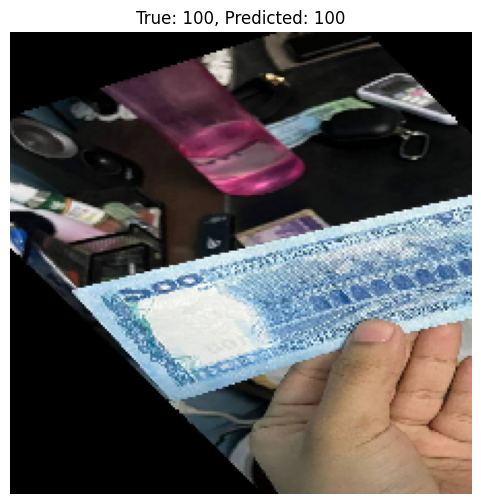

Raw predictions (probabilities): [9.6762031e-01 1.4558436e-02 3.9375914e-04 1.7427474e-02]
Predicted class index: 0
Predicted class name: 100
True class name: 100


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Get one sample image and label from the test dataset
for images, labels in test_ds.take(1):
    sample_image = images[0].numpy().astype("uint8")
    sample_label = labels[0].numpy()
    break

# Preprocess the image for the model
# The model expects a batch of images, so we add a dimension
input_image = tf.expand_dims(sample_image, axis=0)

# Normalize the image (MobileNetV2 expects inputs in [-1, 1])
# Image_dataset_from_directory with uint8 output images, so we need to rescale.
# MobileNetV2 preprocessing typically involves scaling to [-1, 1]
input_image = tf.cast(input_image, tf.float32)
input_image = tf.keras.applications.mobilenet_v2.preprocess_input(input_image)

# Make a prediction
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class_index]

# Get the true class name
true_class_name = class_names[sample_label]

# Display the image and prediction
plt.figure(figsize=(6, 6))
plt.imshow(sample_image)
plt.title(f"True: {true_class_name}, Predicted: {predicted_class_name}")
plt.axis("off")
plt.show()

print(f"Raw predictions (probabilities): {predictions[0]}")
print(f"Predicted class index: {predicted_class_index}")
print(f"Predicted class name: {predicted_class_name}")
print(f"True class name: {true_class_name}")